#### 특정 시각기준 참가자들의 위치를 위도 경도로 표시
- 5K, 10K, 15 ... 로 분류하여 동일지점에 위치한 참가주들의 인원수를 버블차트로 표현(인원이 많을수록 큰 버블)
- 기준시간 : 2시간(7200초)
* 각 개인의 기록중 7200초와 인접한 기록의 구간이 그 참가자의 위치


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 25
plt.rcParams['figure.figsize'] = [40, 16] # 전역으로 차트의 크기 설정
def setTick():
    plt.tick_params(colors='white', which='both', labelsize=20)

# 한글 폰트 설정 & 폰트가 선명하게 보이도록 retina설정
# plt.rc('font', family="Malgun Gothic")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

fontdictHead={'fontsize': 50, 'color': 'yellow'}
fontdictBody={'fontsize': 30, 'color': 'white'}

In [2]:
import pandas as pd
marathonDf = pd.read_csv('./marathon/marathon_results_2017.csv')
marathonDf.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,0:15:25,0:30:28,0:45:44,1:01:15,1:04:35,1:16:59,1:33:01,1:48:19,2:02:53,0:04:57,-,2:09:37,1,1,1
1,1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,0:15:24,0:30:27,0:45:44,1:01:15,1:04:35,1:16:59,1:33:01,1:48:19,2:03:14,0:04:58,-,2:09:58,2,2,2
2,2,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,NaN,0:15:25,0:30:29,0:45:44,1:01:16,1:04:36,1:17:00,1:33:01,1:48:31,2:03:38,0:04:59,-,2:10:28,3,3,3
3,3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,0:15:25,0:30:29,0:45:44,1:01:19,1:04:45,1:17:00,1:33:01,1:48:58,2:04:35,0:05:03,-,2:12:08,4,4,4
4,4,9,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,NaN,0:15:25,0:30:28,0:45:44,1:01:15,1:04:35,1:16:59,1:33:01,1:48:41,2:05:00,0:05:04,-,2:12:35,5,5,5


In [3]:
marathon_2017 = marathonDf.drop(['Unnamed: 0', 'Bib', 'Name', 'Age', 'City', 'State', 'Country', 'Citizen', 'Unnamed: 9', 'Half', 'Pace', 'Proj Time', 'Official Time', 'Overall', 'Gender', 'Division', ], axis='columns')
marathon_2017.head()

,M/F,5K,10K,15K,20K,25K,30K,35K,40K
0,M,0:15:25,0:30:28,0:45:44,1:01:15,1:16:59,1:33:01,1:48:19,2:02:53
1,M,0:15:24,0:30:27,0:45:44,1:01:15,1:16:59,1:33:01,1:48:19,2:03:14
2,M,0:15:25,0:30:29,0:45:44,1:01:16,1:17:00,1:33:01,1:48:31,2:03:38
3,M,0:15:25,0:30:29,0:45:44,1:01:19,1:17:00,1:33:01,1:48:58,2:04:35
4,M,0:15:25,0:30:28,0:45:44,1:01:15,1:16:59,1:33:01,1:48:41,2:05:00


In [4]:
# str 00:00:00 -> timedelta -> float64 -> int64\n"
marathon_2017['5K'] = pd.to_timedelta(marathon_2017['5K']).astype('m8[s]').astype(np.int64)
marathon_2017['10K'] = pd.to_timedelta(marathon_2017['10K']).astype('m8[s]').astype(np.int64)
marathon_2017['15K'] = pd.to_timedelta(marathon_2017['15K']).astype('m8[s]').astype(np.int64)
marathon_2017['20K'] = pd.to_timedelta(marathon_2017['20K']).astype('m8[s]').astype(np.int64)
marathon_2017['25K'] = pd.to_timedelta(marathon_2017['25K']).astype('m8[s]').astype(np.int64)
marathon_2017['30K'] = pd.to_timedelta(marathon_2017['30K']).astype('m8[s]').astype(np.int64)
marathon_2017['35K'] = pd.to_timedelta(marathon_2017['35K']).astype('m8[s]').astype(np.int64)
marathon_2017['40K'] = pd.to_timedelta(marathon_2017['40K']).astype('m8[s]').astype(np.int64)
marathon_2017.head()

,M/F,5K,10K,15K,20K,25K,30K,35K,40K
0,M,925,1828,2744,3675,4619,5581,6499,7373
1,M,924,1827,2744,3675,4619,5581,6499,7394
2,M,925,1829,2744,3676,4620,5581,6511,7418
3,M,925,1829,2744,3679,4620,5581,6538,7475
4,M,925,1828,2744,3675,4619,5581,6521,7500


In [5]:
check_time = 7200
Lat = 0
Long = 0
data4Df = {
    "points" : [
        [42.247835, -71.474357],
        [42.274032, -71.423979],
        [42.282364, -71.364801],
        [42.297870, -71.284260],
        [42.324830, -71.259660],
        [42.345680, -71.215169],
        [42.352089, -71.124947],
        [42.351510, -71.086980]
    ],
    "index" : [
        "5K"
        , "10K"
        , "15K"
        , "20K"
        , "25K"
        , "30K"
        , "35K"
        , "40K"
    ],
    "columns" : ["Lat", "Long"]
}

In [6]:
# 컬럼 Lat과 Long으로 이루어진 데이터프레임 구조를 생성
marathon_location = pd.DataFrame(data4Df['points'], index=data4Df['index'], columns=data4Df['columns'])
marathon_location

,Lat,Long
5K,42.247835,-71.474357
10K,42.274032,-71.423979
15K,42.282364,-71.364801
20K,42.297870,-71.284260
25K,42.324830,-71.259660
30K,42.345680,-71.215169
35K,42.352089,-71.124947
40K,42.351510,-71.086980


In [7]:
# 각 참가자의 구간별 기록과 7200을 비교하여 근접한 구간의 위도와 경도를 위에 생성한 데이터 프레임에 추가합니다.

# .iterrows : 데이터프레임의 행번호(인덱스)와 한라인의 데이터를 for문안에서 차례로 얻어주는 함수
# 데이터프레임을 대상으로 한 라인씩 작업할 때 많이 사용합니다.
for index, record in marathon_2017.iterrows() : # index : 데이터 프레임중 현재행의 인덱스, record : 한 행의 데이터를 각 컬럼 별로 나눠 저장한 리스트
    
    # 40K 지점의 기록이 7200보다 작다면
    if record['40K'] < check_time :
        Lat = data4Df['points'][7][0]
        Long = data4Df['points'][7][1]
    # 40K기록은 기준시각보다 커서 다른 기록 비교
    elif record['35K'] < check_time :
        Lat = data4Df['points'][6][0]
        Long = data4Df['points'][6][1]
    elif record['30K'] < check_time :
        Lat = data4Df['points'][5][0]
        Long = data4Df['points'][5][1]
    elif record['25K'] < check_time :
        Lat = data4Df['points'][4][0]
        Long = data4Df['points'][4][1]
    elif record['20K'] < check_time :
        Lat = data4Df['points'][3][0]
        Long = data4Df['points'][3][1]
    elif record['15K'] < check_time :
        Lat = data4Df['points'][2][0]
        Long = data4Df['points'][2][1]
    elif record['10K'] < check_time :
        Lat = data4Df['points'][1][0]
        Long = data4Df['points'][1][1]
    else :
        Lat = data4Df['points'][0][0]
        Long = data4Df['points'][0][1]
    # if 문을 마치고 나면 7200초가 지난 시점에 참가자의 위치가 Lat, Long에 저장됩니다.
    
    marathon_location = marathon_location.append({"Lat": Lat, "Long": Long}, ignore_index=True)

marathon_location.head()

,Lat,Long
0,42.247835,-71.474357
1,42.274032,-71.423979
2,42.282364,-71.364801
3,42.297870,-71.284260
4,42.324830,-71.259660


In [14]:
# groupby 함수를 이용하여 같은 위도 경도간 인원수를 카운트합니다.
marathon_count = marathon_location.groupby(['Lat', 'Long']).size().reset_index(name="Count")
# marathon_count = marathon_location.groupby(by=['Lat', 'Long'])['Long'].count()
# marathon_count = marathon_location.groupby(by=['Lat', 'Long'])['Lat'].count()
marathon_count

,Lat,Long,Count
0,42.247835,-71.474357,1
1,42.274032,-71.423979,50
2,42.282364,-71.364801,4436
3,42.297870,-71.284260,13867
4,42.324830,-71.259660,7262
5,42.345680,-71.215169,738
6,42.351510,-71.086980,7
7,42.352089,-71.124947,57


0  :  1
42.247835
1  :  50
42.274032
2  :  4436
42.282364
3  :  13867
42.29787
4  :  7262
42.32483
5  :  738
42.34568
6  :  7
42.35151
7  :  57
42.352089


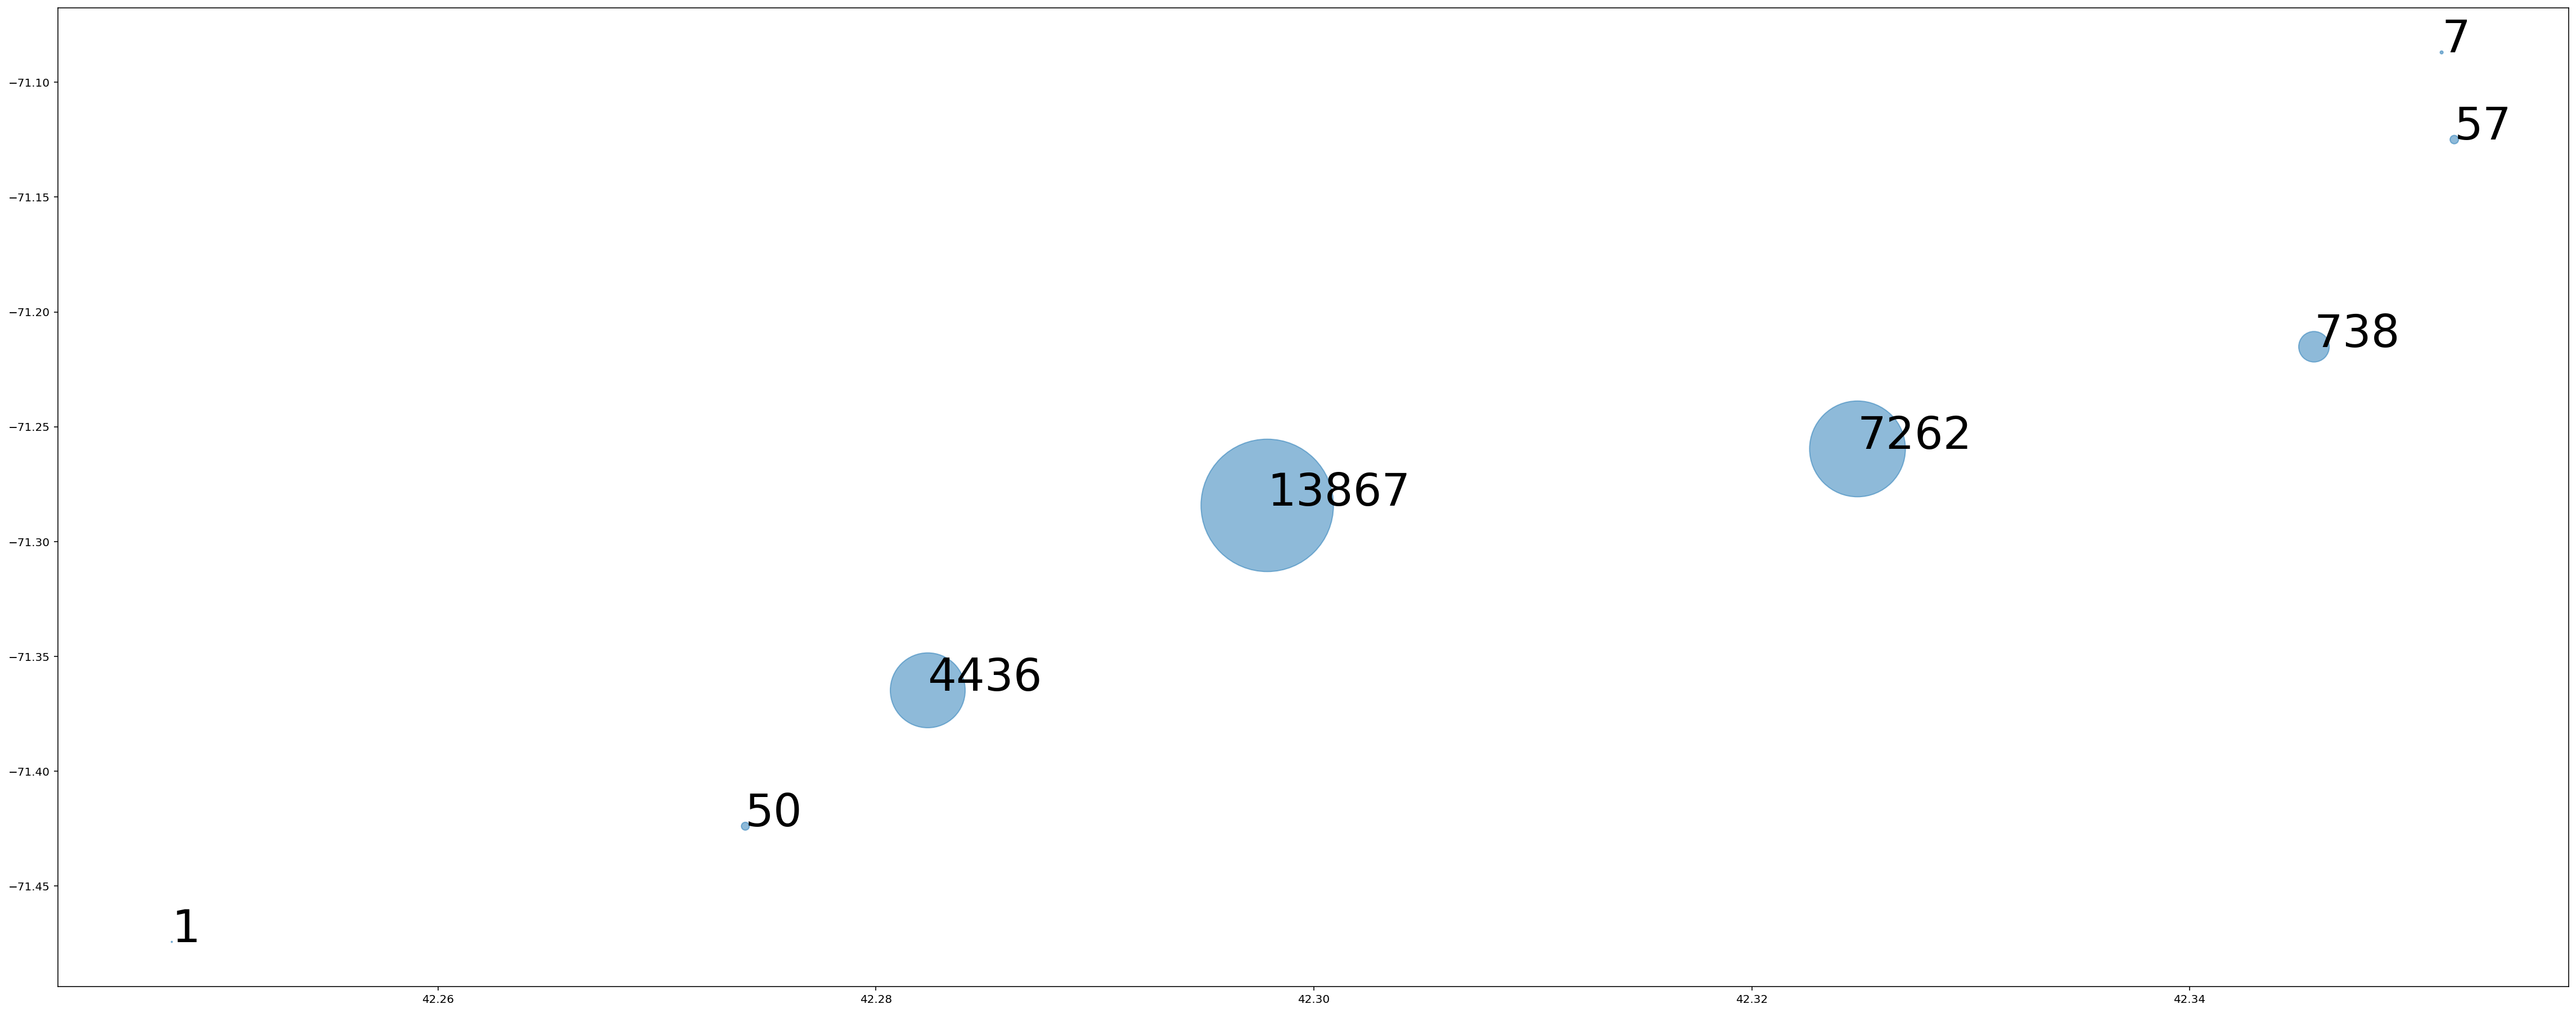

In [11]:
# groupby 결과 데이터로 차트를 생성합니다
plt.scatter(marathon_count['Lat'], marathon_count['Long'], s=marathon_count['Count'], alpha=0.5)
# scatter s(size), c(color)

# plt.annotate('${name}', (42.297870, -71.284260), fontsize=20)
# : 해당경로(좌표)에 name을 표시
# (42.297870, -71.284260) : 차트에 표시될 x좌표값과 y좌표값
for i, txt in enumerate(marathon_count['Count']) :
    # 시리즈 데이터를 대상으로 하나의 데이터와 인덱스를 이용한 반복실행
    print(i, " : ", txt)
    print(marathon_count['Lat'][i])
    plt.annotate(txt, (marathon_count['Lat'][i], marathon_count['Long'][i]),fontsize=40)

# setTick()

plt.show()